<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,32.615887,32.899080,49.438727,24.961564,0.000053,149.915311,149.915374,-0.000063
1,0.0,1.0,25.468658,74.271859,22.772210,89.040261,-0.000032,221.552957,221.553156,-0.000199
2,0.0,2.0,35.210054,76.828028,55.708568,75.211754,0.000163,252.958567,252.958471,0.000096
3,0.0,3.0,44.060112,37.602518,47.943834,34.302976,-0.001069,173.908371,173.909547,-0.001176
4,0.0,4.0,68.059882,67.346541,28.196094,46.023028,-0.000281,219.625263,219.625629,-0.000366
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,50.808865,71.496224,33.031914,20.596863,-0.000393,185.933474,185.933948,-0.000474
249996,999.0,246.0,33.040527,63.252949,97.837435,32.904232,0.000424,237.035567,237.035370,0.000198
249997,999.0,247.0,26.920766,42.991838,51.768091,82.382967,-0.000385,214.063277,214.063729,-0.000451
249998,999.0,248.0,36.014375,28.555095,63.258766,73.784757,-0.000383,211.612610,211.613105,-0.000495


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    32.615887  32.899080  49.438727  24.961564  0.000053  149.915311   
      1.0    25.468658  74.271859  22.772210  89.040261 -0.000032  221.552957   
      2.0    35.210054  76.828028  55.708568  75.211754  0.000163  252.958567   
      3.0    44.060112  37.602518  47.943834  34.302976 -0.001069  173.908371   
      4.0    68.059882  67.346541  28.196094  46.023028 -0.000281  219.625263   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  50.808865  71.496224  33.031914  20.596863 -0.000393  185.933474   
      246.0  33.040527  63.252949  97.837435  32.904232  0.000424  237.035567   
      247.0  26.920766  42.991838  51.768091  82.382967 -0.000385  214.063277   
      248.0  36.014375  28.555095  63.258766  73.784757 -0.000383  211.612610   
      249.0  39.304610  66.671020  30.075037  86.007927  0.000095  232.058688   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    149.915374 -0.000063  
      1.0    221.553156 -0.000199  
      2.0    252.958471  0.000096  
      3.0    173.909547 -0.001176  
      4.0    219.625629 -0.000366  
...                 ...       ...  
999.0 245.0  185.933948 -0.000474  
      246.0  237.035370  0.000198  
      247.0  214.063729 -0.000451  
      248.0  211.613105 -0.000495  
      249.0  232.058550  0.000138  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    32.615887  32.899080  49.438727  24.961564  0.000053  149.915311   
      1.0    25.468658  74.271859  22.772210  89.040261 -0.000032  221.552957   
      2.0    35.210054  76.828028  55.708568  75.211754  0.000163  252.958567   
      3.0    44.060112  37.602518  47.943834  34.302976 -0.001069  173.908371   
      4.0    68.059882  67.346541  28.196094  46.023028 -0.000281  219.625263   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  50.808865  71.496224  33.031914  20.596863 -0.000393  185.933474   
      246.0  33.040527  63.252949  97.837435  32.904232  0.000424  237.035567   
      247.0  26.920766  42.991838  51.768091  82.382967 -0.000385  214.063277   
      248.0  36.014375  28.555095  63.258766  73.784757 -0.000383  211.612610   
      249.0  39.304610  66.671020  30.075037  86.007927  0.000095  232.058688   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    149.915374 -0.000063  
      1.0    221.553156 -0.000199  
      2.0    252.958471  0.000096  
      3.0    173.909547 -0.001176  
      4.0    219.625629 -0.000366  
...                 ...       ...  
999.0 245.0  185.933948 -0.000474  
      246.0  237.035370  0.000198  
      247.0  214.063729 -0.000451  
      248.0  211.613105 -0.000495  
      249.0  232.058550  0.000138  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,32.615887,32.899080,49.438727,24.961564,0.000053,149.915311,149.915374,-0.000063
1,0.0,1.0,25.468658,74.271859,22.772210,89.040261,-0.000032,221.552957,221.553156,-0.000199
2,0.0,2.0,35.210054,76.828028,55.708568,75.211754,0.000163,252.958567,252.958471,0.000096
3,0.0,3.0,44.060112,37.602518,47.943834,34.302976,-0.001069,173.908371,173.909547,-0.001176
4,0.0,4.0,68.059882,67.346541,28.196094,46.023028,-0.000281,219.625263,219.625629,-0.000366
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,50.808865,71.496224,33.031914,20.596863,-0.000393,185.933474,185.933948,-0.000474
249996,999.0,246.0,33.040527,63.252949,97.837435,32.904232,0.000424,237.035567,237.035370,0.000198
249997,999.0,247.0,26.920766,42.991838,51.768091,82.382967,-0.000385,214.063277,214.063729,-0.000451
249998,999.0,248.0,36.014375,28.555095,63.258766,73.784757,-0.000383,211.612610,211.613105,-0.000495


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    32.615887  32.899080  49.438727  24.961564  0.000053  149.915311   
      1.0    25.468658  74.271859  22.772210  89.040261 -0.000032  221.552957   
      2.0    35.210054  76.828028  55.708568  75.211754  0.000163  252.958567   
      3.0    44.060112  37.602518  47.943834  34.302976 -0.001069  173.908371   
      4.0    68.059882  67.346541  28.196094  46.023028 -0.000281  219.625263   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  50.808865  71.496224  33.031914  20.596863 -0.000393  185.933474   
      246.0  33.040527  63.252949  97.837435  32.904232  0.000424  237.035567   
      247.0  26.920766  42.991838  51.768091  82.382967 -0.000385  214.063277   
      248.0  36.014375  28.555095  63.258766  73.784757 -0.000383  211.612610   
      249.0  39.304610  66.671020  30.075037  86.007927  0.000095  232.058688   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    149.915374 -0.000063  
      1.0    221.553156 -0.000199  
      2.0    252.958471  0.000096  
      3.0    173.909547 -0.001176  
      4.0    219.625629 -0.000366  
...                 ...       ...  
999.0 245.0  185.933948 -0.000474  
      246.0  237.035370  0.000198  
      247.0  214.063729 -0.000451  
      248.0  211.613105 -0.000495  
      249.0  232.058550  0.000138  

[250000 rows x 8 columns]

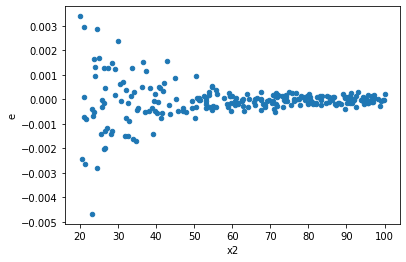

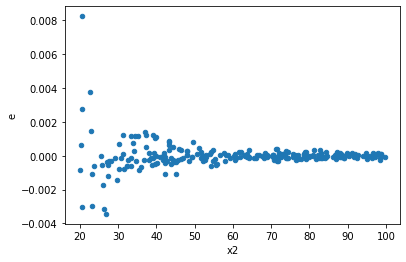

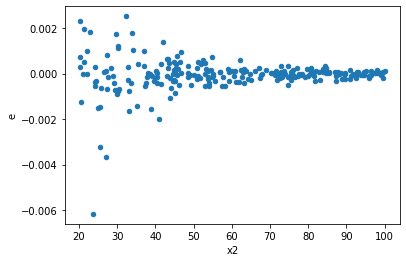

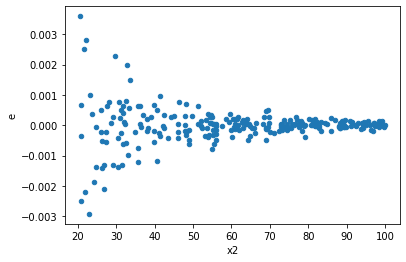

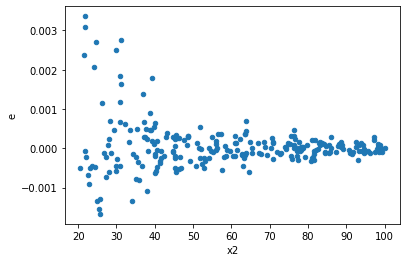

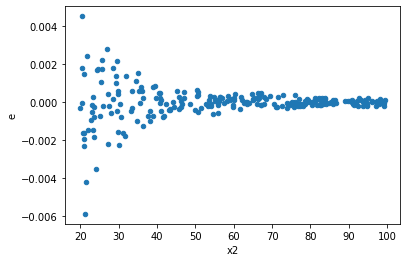

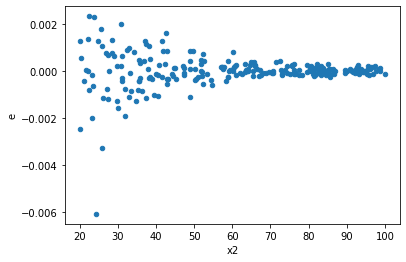

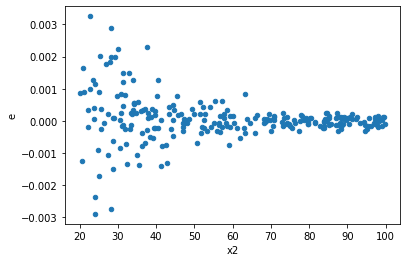

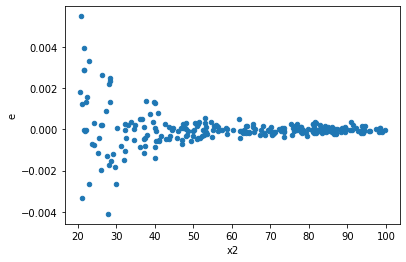

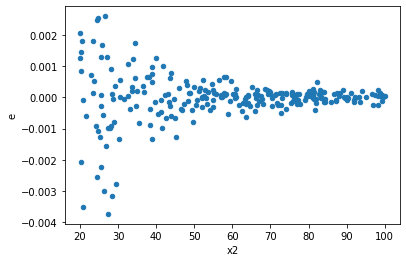

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,135.0,107.0,1.8439921713977878e-05,5.7125061134713556e-05,1.3659201269613244e-07,5.338790760253604e-07,3.9085673128856167,2.5581758933412857e-12,0.9999999999987209,1.2790879466706429e-12,Reject005=0 : Heteroscedasticity
2.0,109.0,133.0,4.071121311120046e-05,9.977119379777406e-05,3.7349736799266473e-07,7.501593518629628e-07,2.0084729268499038,0.00013323950255994532,0.99993338024872,6.661975127997266e-05,Reject005=0 : Heteroscedasticity
4.0,132.0,110.0,2.1661096434530234e-05,5.9288241909858714e-05,1.6409921541310782e-07,5.389840173623519e-07,3.2845008795776316,5.138582892527666e-10,0.9999999997430709,2.569291446263833e-10,Reject005=0 : Heteroscedasticity
6.0,107.0,135.0,7.193166156552606e-06,7.475384763338314e-05,6.722585193039818e-08,5.537322046917269e-07,8.236893825682264,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,132.0,110.0,3.5243237192152646e-05,5.0702229553647734e-05,2.6699422115267154e-07,4.6092935957861577e-07,1.7263645542165087,0.0033144009022618715,0.9983427995488691,0.0016572004511309357,Reject005=0 : Heteroscedasticity
10.0,122.0,120.0,2.762056939595962e-05,0.00011364816800135601,2.263981098029477e-07,9.470680666779668e-07,4.183197763895977,4.707345624410664e-14,0.9999999999999765,2.353672812205332e-14,Reject005=0 : Heteroscedasticity
13.0,115.0,127.0,1.9137028120508384e-05,7.843280715233128e-05,1.6640894017833377e-07,6.175811586797739e-07,3.711225839296476,2.112310326651823e-12,0.9999999999989438,1.0561551633259114e-12,Reject005=0 : Heteroscedasticity
15.0,123.0,119.0,5.169982047806242e-05,0.0001224118356076782,4.203237437240847e-07,1.0286708874594806e-06,2.4473299517781615,1.4283356279953807e-06,0.999999285832186,7.141678139976904e-07,Reject005=0 : Heteroscedasticity
17.0,134.0,108.0,4.527583594958846e-05,6.853198646299122e-05,3.378793727581228e-07,6.345554302128816e-07,1.8780531792544195,0.0007575716537209232,0.9996212141731395,0.0003787858268604616,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,125.0,117.0,6.874350359034662e-05,1.229762911553708e-05,5.49948028722773e-07,1.0510794115843657e-07,0.191123407429143,3.3356202727897955e-18,Reject005=0 : Heteroscedasticity
1.0,135.0,107.0,1.8439921713977878e-05,5.7125061134713556e-05,1.3659201269613244e-07,5.338790760253604e-07,3.9085673128856167,2.5581758933412857e-12,Reject005=0 : Heteroscedasticity
2.0,109.0,133.0,4.071121311120046e-05,9.977119379777406e-05,3.7349736799266473e-07,7.501593518629628e-07,2.0084729268499038,0.00013323950255994532,Reject005=0 : Heteroscedasticity
3.0,124.0,118.0,7.63295707898372e-05,6.191302627292131e-05,6.155610547567516e-07,5.246866633298417e-07,0.8523714411029133,0.37990800204441205,Reject005=1 : Homoscedasticity
4.0,132.0,110.0,2.1661096434530234e-05,5.9288241909858714e-05,1.6409921541310782e-07,5.389840173623519e-07,3.2845008795776316,5.138582892527666e-10,Reject005=0 : Heteroscedasticity
5.0,110.0,132.0,7.169168356796421e-05,3.0420147711353017e-05,6.517425778905837e-07,2.304556644799471e-07,0.35359921585272985,4.353535541342035e-08,Reject005=0 : Heteroscedasticity
6.0,107.0,135.0,7.193166156552606e-06,7.475384763338314e-05,6.722585193039818e-08,5.537322046917269e-07,8.236893825682264,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,110.0,132.0,6.6931490606839e-05,4.1864203895611594e-05,6.08468096425809e-07,3.1715305981523934e-07,0.5212320279045395,0.00048000700949709404,Reject005=0 : Heteroscedasticity
8.0,132.0,110.0,3.5243237192152646e-05,5.0702229553647734e-05,2.6699422115267154e-07,4.6092935957861577e-07,1.7263645542165087,0.0033144009022618715,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    959
Reject005=1 : Homoscedasticity       41
Name: Result_test, dtype: int64